# Reproducing Ben Wellington's analysis of NYC taxi tips

This notebook reproduces Ben Wellington's analysis of New York City taxi tips in 2014. It is based on his article [How software in half of NYC cabs generates $5.2 million a year in extra tips](https://iquantny.tumblr.com/post/107245431809/how-software-in-half-of-nyc-cabs-generates-52). It uses the full month of yellow [taxi data](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) (October 2014), but it can also be replicated with smaller datasets (eg. one week).

**Import libraries: Pandas, Numpy, Matplotlib**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Import one month of taxi data**

In [2]:
taxiData = pd.read_csv('../input/yellow_tripdata_2014-10.csv', delimiter=',', header=0, encoding='UTF-8')

In [3]:
taxiData.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-10-01 08:55:07,2014-10-01 09:11:03,1,2.2,-74.005867,40.737570,1,Y,-74.015534,40.708277,CRD,12.0,0.0,0.5,1.0,0.0,13.5
1,CMT,2014-10-01 10:51:17,2014-10-01 11:26:11,1,15.7,-73.873193,40.774056,1,Y,-73.999846,40.631132,CRD,45.5,0.0,0.5,9.2,0.0,55.2
2,CMT,2014-10-01 02:03:03,2014-10-01 02:06:55,1,1.0,0.000000,0.000000,1,N,0.000000,0.000000,CRD,5.0,0.5,0.5,1.0,0.0,7.0
3,CMT,2014-10-01 00:06:35,2014-10-01 00:17:05,2,2.5,-73.987151,40.732922,1,N,-73.991831,40.758148,CRD,10.0,0.5,0.5,2.2,0.0,13.2
4,CMT,2014-10-01 01:34:13,2014-10-01 01:47:02,1,4.2,-73.983267,40.726577,1,N,-73.937556,40.716380,CRD,15.0,0.5,0.5,3.2,0.0,19.2


In [4]:
taxiData.shape

(14232487, 18)

**Calculate new column for tip percentage**

In [5]:
taxiData['tip_perc'] = taxiData[' tip_amount'] / (taxiData[' fare_amount'] + taxiData[' surcharge']) * 100

In [6]:
taxiData.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,tip_perc
0,CMT,2014-10-01 08:55:07,2014-10-01 09:11:03,1,2.2,-74.005867,40.737570,1,Y,-74.015534,40.708277,CRD,12.0,0.0,0.5,1.0,0.0,13.5,8.333333
1,CMT,2014-10-01 10:51:17,2014-10-01 11:26:11,1,15.7,-73.873193,40.774056,1,Y,-73.999846,40.631132,CRD,45.5,0.0,0.5,9.2,0.0,55.2,20.219780
2,CMT,2014-10-01 02:03:03,2014-10-01 02:06:55,1,1.0,0.000000,0.000000,1,N,0.000000,0.000000,CRD,5.0,0.5,0.5,1.0,0.0,7.0,18.181818
3,CMT,2014-10-01 00:06:35,2014-10-01 00:17:05,2,2.5,-73.987151,40.732922,1,N,-73.991831,40.758148,CRD,10.0,0.5,0.5,2.2,0.0,13.2,20.952381
4,CMT,2014-10-01 01:34:13,2014-10-01 01:47:02,1,4.2,-73.983267,40.726577,1,N,-73.937556,40.716380,CRD,15.0,0.5,0.5,3.2,0.0,19.2,20.645161


**Create histogram of the tip percentage**

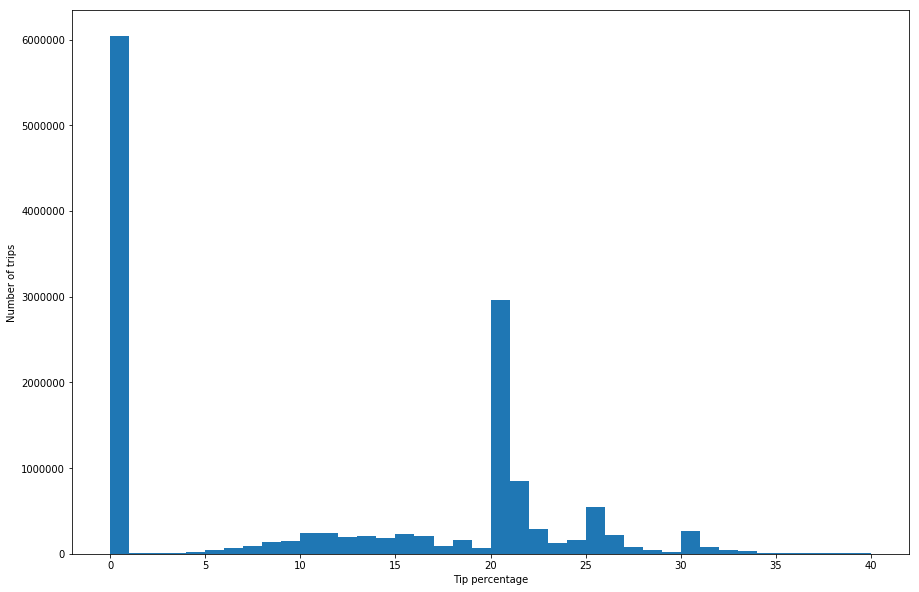

In [7]:
bins = np.arange(0, 41, 1)
plt.rcParams["figure.figsize"] = [15,10]
plt.hist(taxiData['tip_perc'], bins=bins)
plt.ylabel('Number of trips')
plt.xlabel('Tip percentage')
plt.show()

Another version of the histogram with a **log** scale

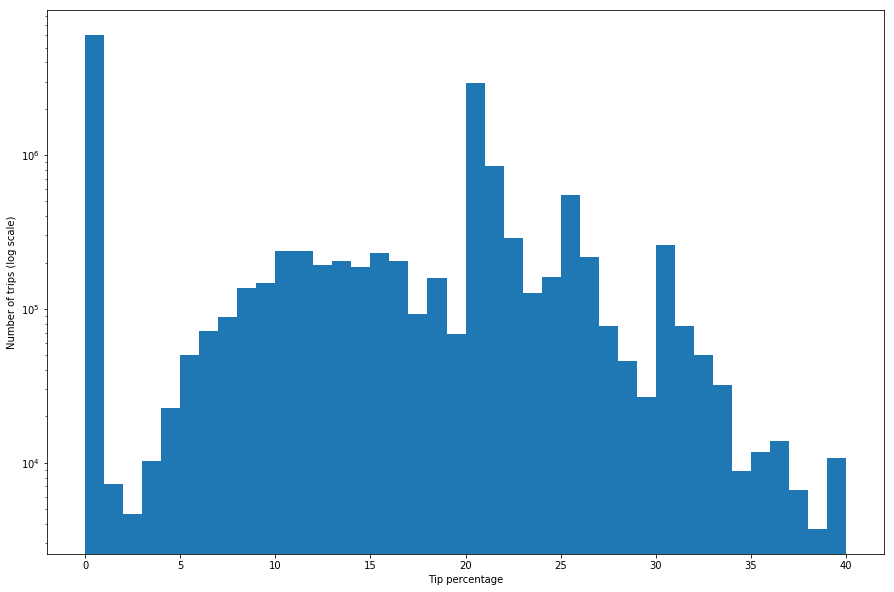

In [8]:
bins = np.arange(0, 41, 1)
plt.rcParams["figure.figsize"] = [15,10]
plt.hist(taxiData['tip_perc'], bins=bins, log=True)
plt.ylabel('Number of trips (log scale)')
plt.xlabel('Tip percentage')
plt.show()

And yet another version **without the trips with no tips**

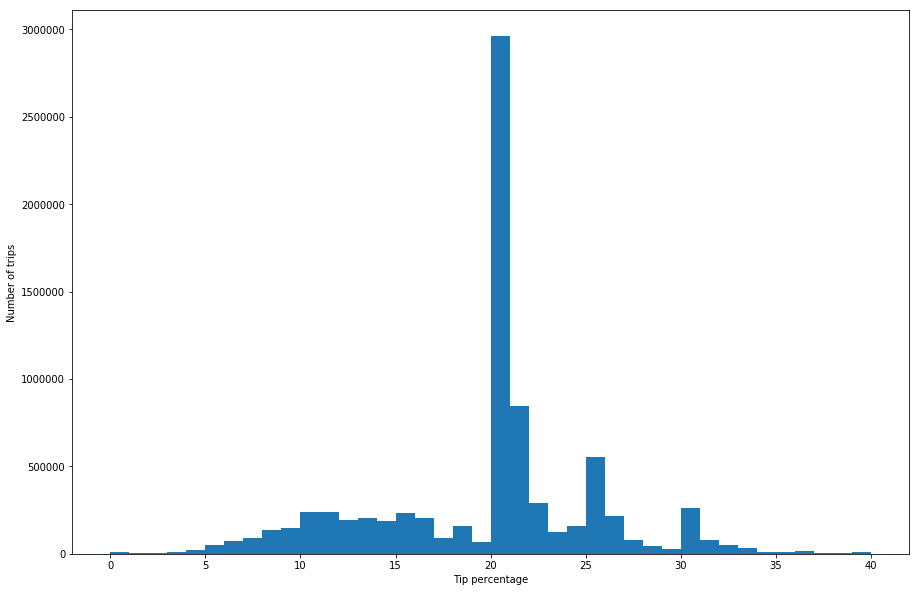

In [9]:
tripsWithTips = taxiData[taxiData['tip_perc'] > 0.0]
bins = np.arange(0, 41, 1)
plt.rcParams["figure.figsize"] = [15,10]
plt.hist(tripsWithTips['tip_perc'], bins=bins)
plt.ylabel('Number of trips')
plt.xlabel('Tip percentage')
plt.show()

**Calculating the average tip for every hour of the day**

Grouping the dataset based on the hour (independent of the day)

In [10]:
taxiData['startDatetime'] = pd.to_datetime(taxiData[' pickup_datetime'])
taxiData['startHour'] = taxiData['startDatetime'].dt.hour
taxiData.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,tip_perc,startDatetime,startHour
0,CMT,2014-10-01 08:55:07,2014-10-01 09:11:03,1,2.2,-74.005867,40.737570,1,Y,-74.015534,...,CRD,12.0,0.0,0.5,1.0,0.0,13.5,8.333333,2014-10-01 08:55:07,8
1,CMT,2014-10-01 10:51:17,2014-10-01 11:26:11,1,15.7,-73.873193,40.774056,1,Y,-73.999846,...,CRD,45.5,0.0,0.5,9.2,0.0,55.2,20.219780,2014-10-01 10:51:17,10
2,CMT,2014-10-01 02:03:03,2014-10-01 02:06:55,1,1.0,0.000000,0.000000,1,N,0.000000,...,CRD,5.0,0.5,0.5,1.0,0.0,7.0,18.181818,2014-10-01 02:03:03,2
3,CMT,2014-10-01 00:06:35,2014-10-01 00:17:05,2,2.5,-73.987151,40.732922,1,N,-73.991831,...,CRD,10.0,0.5,0.5,2.2,0.0,13.2,20.952381,2014-10-01 00:06:35,0
4,CMT,2014-10-01 01:34:13,2014-10-01 01:47:02,1,4.2,-73.983267,40.726577,1,N,-73.937556,...,CRD,15.0,0.5,0.5,3.2,0.0,19.2,20.645161,2014-10-01 01:34:13,1


In [11]:
hourlyData = taxiData.groupby(taxiData['startHour']).mean()
hourlyData.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,tip_perc,startHour
startHour,,,,,,,,,,,,,,,
0,1.731408,3.325418,-72.759093,40.071492,1.036750,-72.781192,40.089153,13.153811,0.490265,0.497877,1.640403,0.186059,15.968550,12.032201,0.0
1,1.724749,3.226425,-72.681423,40.025967,1.034244,-72.698752,40.044032,12.689419,0.492956,0.497497,1.534484,0.128749,15.343252,11.943605,1.0
2,1.716703,3.243957,-72.637121,39.999602,1.032446,-72.681845,40.035056,12.580079,0.494857,0.497299,1.472163,0.098580,15.143174,11.780241,2.0
3,1.722750,3.458043,-72.562641,39.958660,1.042257,-72.600160,39.991493,13.122985,0.492484,0.496310,1.449391,0.127765,15.689136,11.321565,3.0
4,1.701886,4.182564,-72.512030,39.936662,1.075797,-72.563327,39.976959,15.038256,0.481226,0.493982,1.592522,0.401139,18.007252,10.364188,4.0


In [12]:
hourlyData.shape

(24, 15)

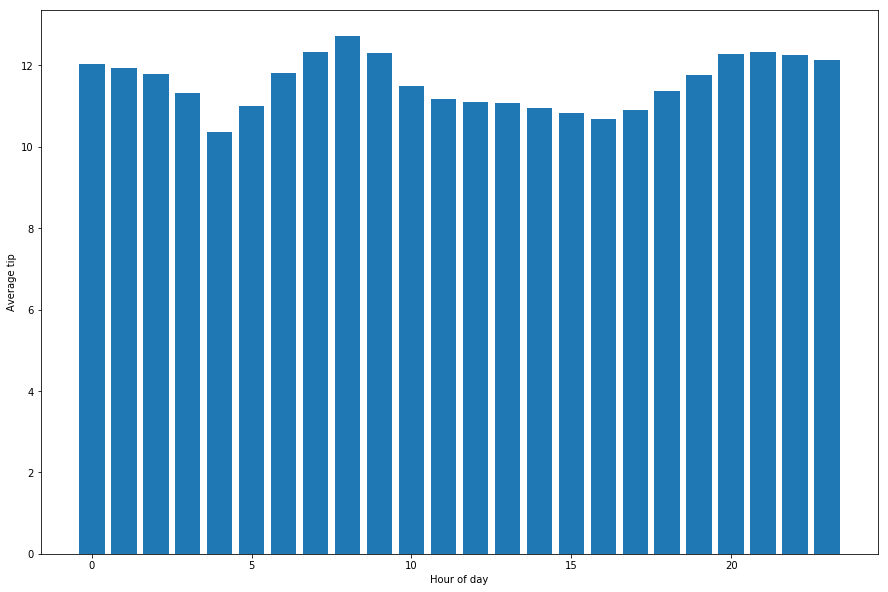

In [13]:
plt.rcParams["figure.figsize"] = [15,10]
plt.bar(hourlyData['startHour'], hourlyData['tip_perc'])
plt.ylabel('Average tip')
plt.xlabel('Hour of day')
plt.show()

**Filtering by vendor (CMT & VTS)**

In [14]:
taxiData['vendor_id'].unique()

array(['CMT', 'VTS'], dtype=object)

Two ways of calculating the tip percentage:
* tip_perc = (fare + surcharge) / tip
* tip_perc2 = (fare + surcharge + taxes + toll) / tip

In [15]:
taxiData['tip_perc2'] =  taxiData[' tip_amount'] / (taxiData[' fare_amount'] + taxiData[' surcharge'] + taxiData[' mta_tax'] + taxiData[' tolls_amount']) * 100

In [16]:
taxiData.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,...,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,tip_perc,startDatetime,startHour,tip_perc2
0,CMT,2014-10-01 08:55:07,2014-10-01 09:11:03,1,2.2,-74.005867,40.737570,1,Y,-74.015534,...,12.0,0.0,0.5,1.0,0.0,13.5,8.333333,2014-10-01 08:55:07,8,8.000000
1,CMT,2014-10-01 10:51:17,2014-10-01 11:26:11,1,15.7,-73.873193,40.774056,1,Y,-73.999846,...,45.5,0.0,0.5,9.2,0.0,55.2,20.219780,2014-10-01 10:51:17,10,20.000000
2,CMT,2014-10-01 02:03:03,2014-10-01 02:06:55,1,1.0,0.000000,0.000000,1,N,0.000000,...,5.0,0.5,0.5,1.0,0.0,7.0,18.181818,2014-10-01 02:03:03,2,16.666667
3,CMT,2014-10-01 00:06:35,2014-10-01 00:17:05,2,2.5,-73.987151,40.732922,1,N,-73.991831,...,10.0,0.5,0.5,2.2,0.0,13.2,20.952381,2014-10-01 00:06:35,0,20.000000
4,CMT,2014-10-01 01:34:13,2014-10-01 01:47:02,1,4.2,-73.983267,40.726577,1,N,-73.937556,...,15.0,0.5,0.5,3.2,0.0,19.2,20.645161,2014-10-01 01:34:13,1,20.000000


In [17]:
taxiData['tip_perc3'] = np.where(taxiData['vendor_id']=='CMT', taxiData['tip_perc2'], taxiData['tip_perc'])

In [18]:
taxiData.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,...,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,tip_perc,startDatetime,startHour,tip_perc2,tip_perc3
0,CMT,2014-10-01 08:55:07,2014-10-01 09:11:03,1,2.2,-74.005867,40.737570,1,Y,-74.015534,...,0.0,0.5,1.0,0.0,13.5,8.333333,2014-10-01 08:55:07,8,8.000000,8.000000
1,CMT,2014-10-01 10:51:17,2014-10-01 11:26:11,1,15.7,-73.873193,40.774056,1,Y,-73.999846,...,0.0,0.5,9.2,0.0,55.2,20.219780,2014-10-01 10:51:17,10,20.000000,20.000000
2,CMT,2014-10-01 02:03:03,2014-10-01 02:06:55,1,1.0,0.000000,0.000000,1,N,0.000000,...,0.5,0.5,1.0,0.0,7.0,18.181818,2014-10-01 02:03:03,2,16.666667,16.666667
3,CMT,2014-10-01 00:06:35,2014-10-01 00:17:05,2,2.5,-73.987151,40.732922,1,N,-73.991831,...,0.5,0.5,2.2,0.0,13.2,20.952381,2014-10-01 00:06:35,0,20.000000,20.000000
4,CMT,2014-10-01 01:34:13,2014-10-01 01:47:02,1,4.2,-73.983267,40.726577,1,N,-73.937556,...,0.5,0.5,3.2,0.0,19.2,20.645161,2014-10-01 01:34:13,1,20.000000,20.000000


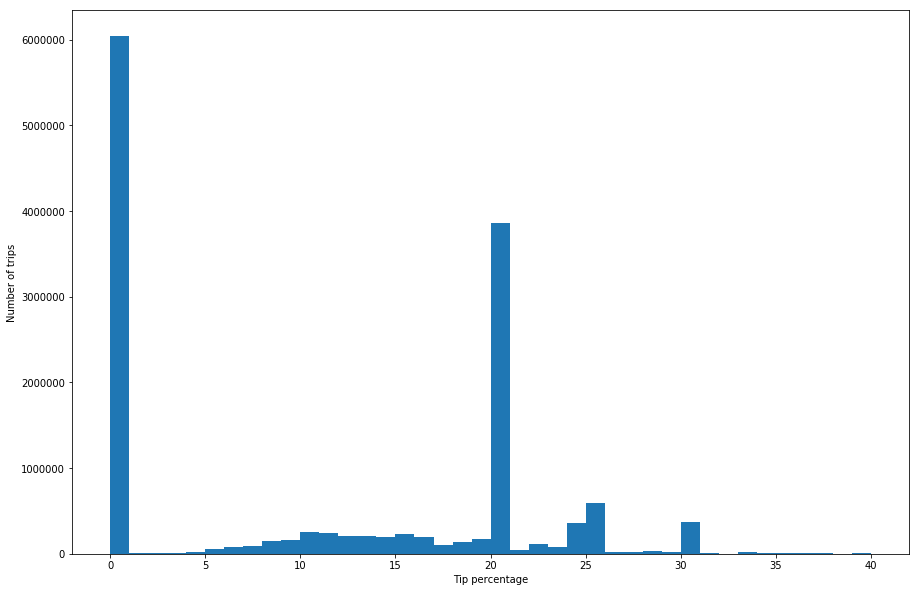

In [19]:
bins = np.arange(0, 41, 1)
plt.rcParams["figure.figsize"] = [15,10]
plt.hist(taxiData['tip_perc3'], bins=bins)
plt.ylabel('Number of trips')
plt.xlabel('Tip percentage')
plt.show()

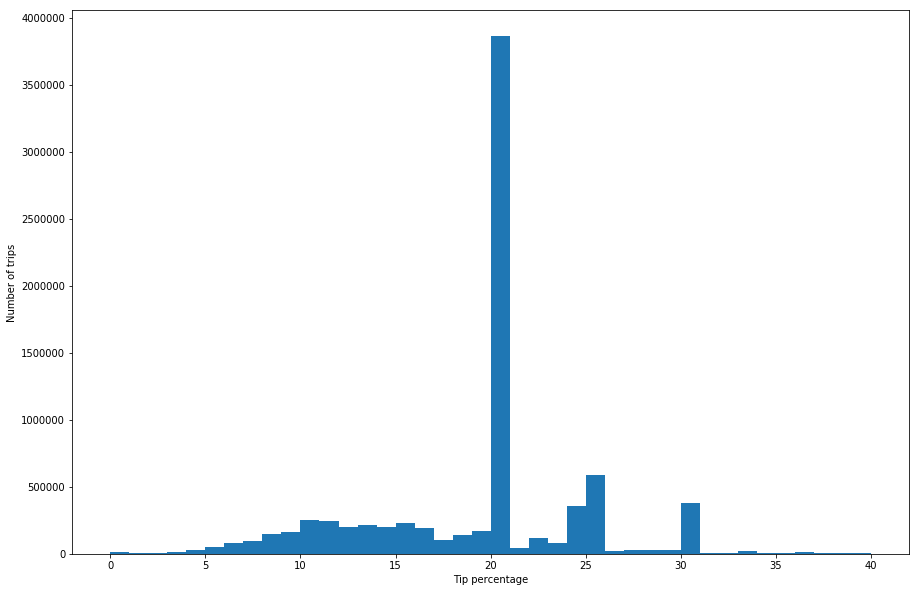

In [20]:
tripsWithTips = taxiData[taxiData['tip_perc3'] > 0.0]
bins = np.arange(0, 41, 1)
plt.rcParams["figure.figsize"] = [15,10]
plt.hist(tripsWithTips['tip_perc3'], bins=bins)
plt.ylabel('Number of trips')
plt.xlabel('Tip percentage')
plt.show()

In [39]:
taxiData['tipAsPercFare'] = taxiData[' tip_amount'] / taxiData[' fare_amount'] * 100
hourlyData2 = taxiData.groupby(taxiData['startHour']).mean()
hourlyData2.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,tip_perc,startHour,tip_perc2,tip_perc3,extraTip,tipAsPercFare
startHour,,,,,,,,,,,,,,,,,,,
0,1.731408,3.325418,-72.759093,40.071492,1.036750,-72.781192,40.089153,13.153811,0.490265,0.497877,1.640403,0.186059,15.968550,12.032201,0.0,11.363026,11.697462,0.039228,12.705429
1,1.724749,3.226425,-72.681423,40.025967,1.034244,-72.698752,40.044032,12.689419,0.492956,0.497497,1.534484,0.128749,15.343252,11.943605,1.0,11.285678,11.611461,0.035263,12.640806
2,1.716703,3.243957,-72.637121,39.999602,1.032446,-72.681845,40.035056,12.580079,0.494857,0.497299,1.472163,0.098580,15.143174,11.780241,2.0,11.120799,11.445486,0.033816,12.485041
3,1.722750,3.458043,-72.562641,39.958660,1.042257,-72.600160,39.991493,13.122985,0.492484,0.496310,1.449391,0.127765,15.689136,11.321565,3.0,10.690957,10.993547,0.034546,11.999360
4,1.701886,4.182564,-72.512030,39.936662,1.075797,-72.563327,39.976959,15.038256,0.481226,0.493982,1.592522,0.401139,18.007252,10.364188,4.0,9.693208,10.011860,0.051232,10.972101


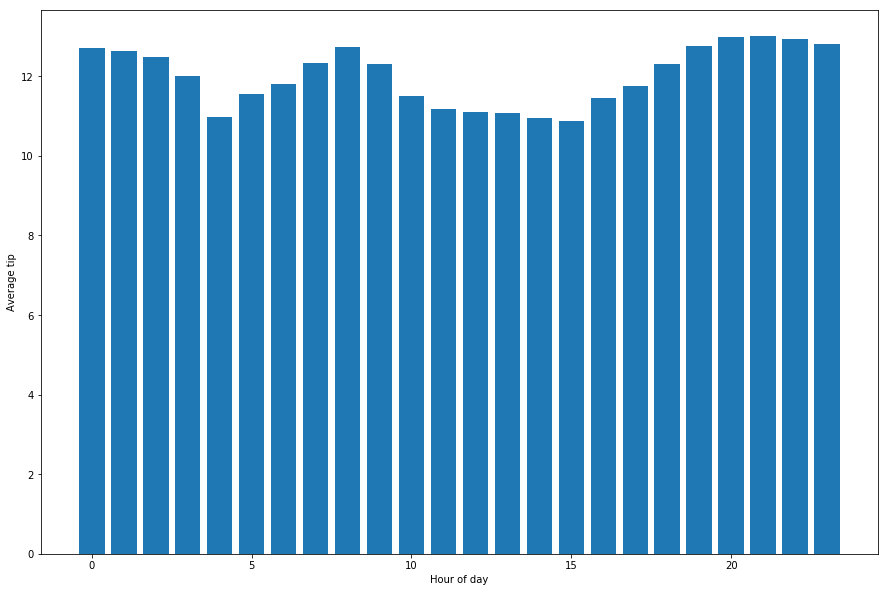

In [40]:
plt.rcParams["figure.figsize"] = [15,10]
plt.bar(hourlyData2.index, hourlyData2['tipAsPercFare'])
plt.ylabel('Average tip')
plt.xlabel('Hour of day')
plt.show()

**Calculating the difference in $$**

In [33]:
taxiData['extraTip'] = np.where(taxiData['vendor_id']=='CMT', taxiData[' tip_amount'] - taxiData['tip_perc2'] * (taxiData[' fare_amount'] + taxiData[' surcharge']) / 100, 0)

In [35]:
taxiData.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,total_amount,tip_perc,startDatetime,startHour,tip_perc2,tip_perc3,extraTip
0,CMT,2014-10-01 08:55:07,2014-10-01 09:11:03,1,2.2,-74.005867,40.737570,1,Y,-74.015534,...,0.5,1.0,0.0,13.5,8.333333,2014-10-01 08:55:07,8,8.000000,8.000000,0.040000
1,CMT,2014-10-01 10:51:17,2014-10-01 11:26:11,1,15.7,-73.873193,40.774056,1,Y,-73.999846,...,0.5,9.2,0.0,55.2,20.219780,2014-10-01 10:51:17,10,20.000000,20.000000,0.100000
2,CMT,2014-10-01 02:03:03,2014-10-01 02:06:55,1,1.0,0.000000,0.000000,1,N,0.000000,...,0.5,1.0,0.0,7.0,18.181818,2014-10-01 02:03:03,2,16.666667,16.666667,0.083333
3,CMT,2014-10-01 00:06:35,2014-10-01 00:17:05,2,2.5,-73.987151,40.732922,1,N,-73.991831,...,0.5,2.2,0.0,13.2,20.952381,2014-10-01 00:06:35,0,20.000000,20.000000,0.100000
4,CMT,2014-10-01 01:34:13,2014-10-01 01:47:02,1,4.2,-73.983267,40.726577,1,N,-73.937556,...,0.5,3.2,0.0,19.2,20.645161,2014-10-01 01:34:13,1,20.000000,20.000000,0.100000


In [38]:
taxiData['extraTip'].sum()

631547.1330088635